# Dynamic Programming and Structural Econometrics #5

### Function approximation and interpolation

**Readings:** 
- 📖 Judd, K. L. (1998). Numerical methods in economics. MIT press. Section 6
- 📖 Jerome Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” Sections 3.5 

by Bertel Schjerning

University of Copenhagen


### Agenda
- The approximation problem
    - How to approximate function f(x) given data of $ f(x) $ in $ n $ points
  $ (x_1,\dots,x_n) $  
- Sieve approximation (we can use simple linear regression)
    - Examples: Polynomials, Splines
    - Properties of approximation methods crucially depends on support of basis functions 
    - Splines has bounded support $\rightarrow$ local approximation
    - Polynomials has unbounded support $\rightarrow$ global approximation    
- Orthogonal polynomials
    - Leading example: Chebyshev polynomials
    - Optimal nodes: Chebyshev zeros $\rightarrow$ minimizes the maximum error bound (min-max property)
    - Very good to approximate smooth functions, but has issues with kinks. 
    
- Multivariate extensions
    - 1d sieve methods can be directly generalized to d dimensions using a tensor-product basis and a Cartesian grid
    - CURSE of Dimensionality
    - Solutions: Sparse grids or machine learning (Lasso, Neural nets, etc)


### Approximation problem

- $ f(x) $ is function of interest, hard to compute  
- Have data on values of $ f(x) $ in $ n $ points
  $ (x_1,\dots,x_n) $  


$$
f(x_1), f(x_2), \dots f(x_n)
$$

- Need to find the approximate value $\hat{f}(x)$ of the function $ f(x) $ in
  arbitrary points $ x \in [a,b]$ 
- We need to extrapolate if $a<x_1$ or $b>x_n$  

### Before we move on we need some standard libraries, tools for sieve interpolation, tools for potting etc. 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.linalg as la
from lib.sieve import * # sieve library for function approximation
import matplotlib.pyplot as plt
from scipy import interpolate # Interpolation routines
from numpy.polynomial import polynomial
%matplotlib inline
plt.rcParams.update({'font.size': 16})

### Example
- Let's consider the function $f(x)=\exp(-x/4)\sin(x) + 1/(1+x^2)$
- Assume we have data of values of $f(x)$ in $m$ grid points $x^g=(x_1,\dots,x_m)$ and want to approximate $f(x)$ for any $x$ on the interval $x \in [a, b]$
- Easy to approximate $f(x)$ with a simple linear interpolation
- Can we find a better approximation $\hat{f}(x)$ 

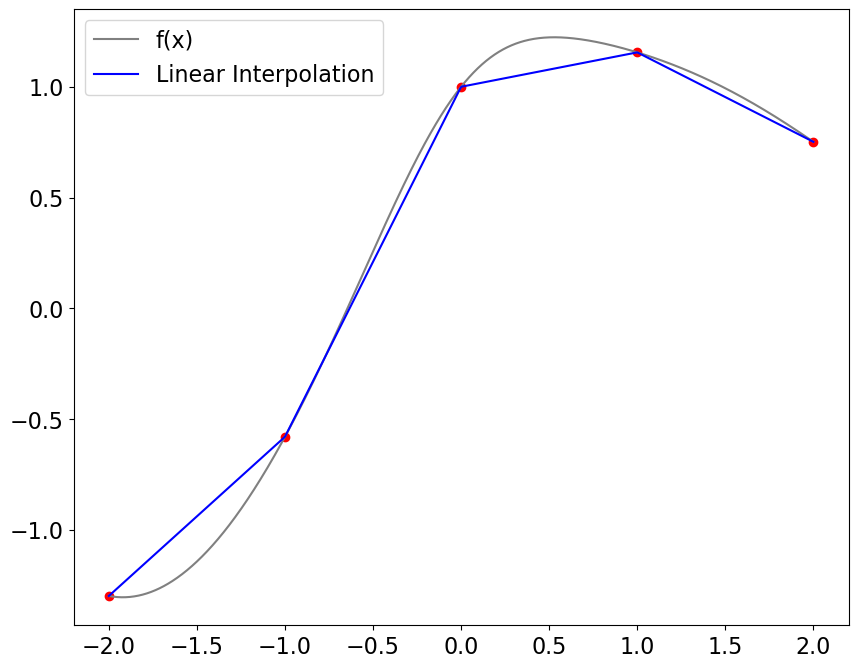

In [3]:
f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)    # function to interpolate/approximate
m=5; a=-2; b=2;            # n:   Number of datapoints and limits for on interval                         
x0 = np.linspace(a,b,m);   # x0:  grid points where we know f(x)
fx0=f(x0)                  # fx0: function values at x0
fhat = interpolate.interp1d(x0,fx0) # returns the interpolation function
plot1d(f, x0, fx0, fhat, label='Linear Interpolation') # use the plotting tool in sieve.py

### Approaches

1. *Piece-wise* approach (connect the dots)  
    - Which functional form to use for connections?
    - Simple lienar interpolation and splines are examples of this approach
    - What are advantages and disadvantages? 


1. Use a *similar* function $s(x)$ to represent $ f(x) $
  between the data points  
    - Which simpler function?  
    - Example: $s(x)$ could be a polynomial 
    - What data should be used?  
    - How to control the accuracy of the approximation? 

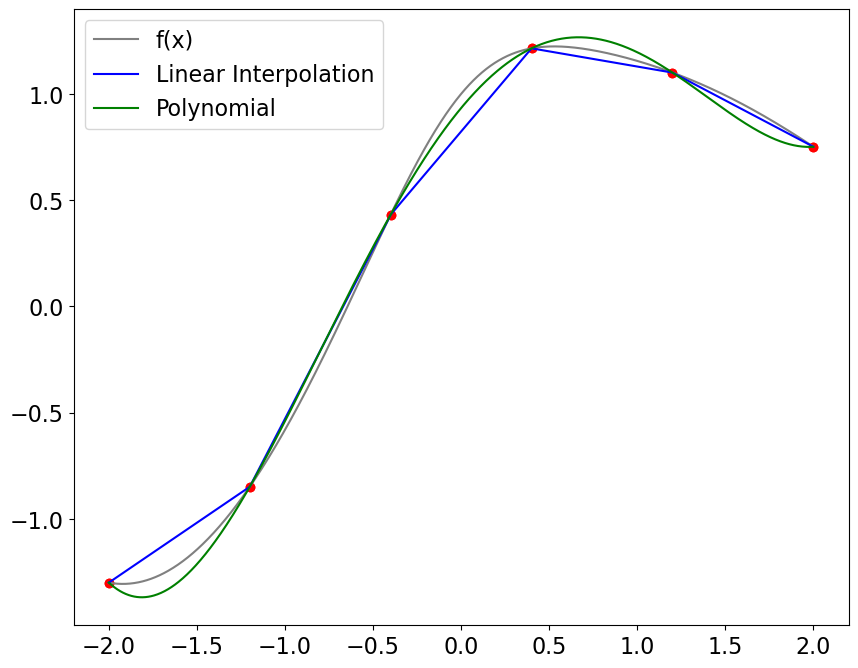

In [10]:
m=6; a=-2; b=2;            # m:   Number of datapoints and limits for on interval  
x0 = np.linspace(a,b,m);   # x0:  grid points where we know f(x)
fx0=f(x0)                  # fx0: function values at x0
fhat = interpolate.interp1d(x0,fx0) # returns the interpolation function
plot1d(f, x0, fx0, fhat, label='Linear Interpolation') # use the the plotting tool
p = polynomial.polyfit(x0,fx0,m-1) # returns the interpolation function
fhat = lambda x: polynomial.polyval(x,p)
plot1d(None, x0, fx0, fhat, label='Polynomial', color='g') # use the the plotting tool

### Sieve approximation
- **An example a local piecewise approach** is to approximate $f(x)$ by a stepwise flat function. 
- This would involve dividing the interval $[a,b]=[x_0,x_{n+1}]$ in to $n+1$ subintervals $ [x_j,x_{j+1}] $, $ j=0,\dots,n$ and approximate $f(x)$ by
    $$f(x) \approx \sum_{j=0}^{n} \alpha_j \mathbb{1}(x_j\le x < x_{j+1}) $$

- **An example of a more smooth approach** is to approximate $f(x)$ (simple algebraic) polynomial of degree $n$ so that 
    $$f(x) \approx p_n(x,\alpha)=\alpha_0 + \alpha_1 x + \alpha_2 x^2 \dots + \alpha_n x^n = \sum_{j=0}^n \alpha_j x^j $$
    
- Both approaches are really a special case of the same class of function, **linear sieves**
- Linear sieves are essentially linear functions with  $n+1$ parameters and corresponding basis functions $\{B_i(x)\}_{i=0}^{n}$ such that
 $$f(x) \approx s(x,\alpha)= \sum_{j=0}^{n} \alpha_j B_j(x) $$
 where $B_j(x)=\mathbb{1}(x_j\le x < x_{j+1}) $ for the step-function and $B_j(x)=x^j$ for a simple algebraic polynomial
   

### How do we approximate $f(x)$ by the sieve $s(x,\alpha)$

Suppose that: 
- We have access to a "data set" $ \{(x_i,f(x_i)\}, i=1,\dots,m$  
- We know the functional form of the $n+1$ basis functions $\{B_i(x)\}_{i=0}^{n}$. For example $B_j(x)=x^j$ in case of simple polynomials

- In the case of a linear sieve we can easily "estimate" $\alpha=\alpha_0,\dots,\alpha_{m-1}$   using linear regression based on a set of $m\ge n+1$ grid points on x and f(x). 

$$ \hat{\alpha} = \arg \min_{\alpha \in \mathbb{R}^n} \sum_{i=1}^{m} \left[f(x_i)-\sum_{j=0}^{n} \alpha_j B_j(x_i) \right]^2
$$

### Can we approximate f(x)?
Can we find $\alpha$? 
- Yes, if we have $m \ge n+1$ data points and $x_i$ are distinct such that $B_i(x_i)$ are not co-linear, all $n+1$ elements in the vector of sieve coefficients $\alpha$ are uniquely identified. 
- Good old OLS $\alpha=\left(B(x)'B(x)\right)^{-1}B(x)'f(x)$


Can we deal with with high order polynomials if x is large? 
- Yes, change of variable from $x\in [a,b]$ to $z\in [-1,1]$. 

Can we approximate f(x). 
- Yes, at least in the nodes (perfectly if $m=n+1$). 
- Before we formally study the theoretical properties, let's just try

In [17]:
x0

array([[-5.  ],
       [ 8.75],
       [22.5 ],
       [36.25],
       [50.  ]])

In [20]:
## f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)    # function to interpolate/approximate
m = 5      # m:   Number of datapoints                     
deg = 2;   # degree of polynmial (n above)  # Try different m and deg (identification/fit)
s1=sieve(m,deg, a=-5, b=50, btype='algpol', gridtype='u')    #  uncomment to try algebraic polynomials with uniform grid
#s1=sieve(m,deg, a=-5, b=50, btype='chebyshev', gridtype='c') #  uncomment to try chebyshev polynomials with chebyshev nodes
#s1=sieve(m,deg, a=-5, b=50, btype='b-spline', gridtype='u') # uncomment to try bsplines (note:  use m=5, deg=1, 2, 3)
x0=s1.x      # x0: grid points where we know f(x) 
z0=s1.z      # z0: same but on [-1,1] interval (change of varibale to avoid overflow for polynomial approximation)
fx0=f(x0)    # fx0: function values at x0
B=sieve.basis(x0, s1.deg, s1.btype, s1.knotsx)  # matrix of basis functions: Try x0 and z0 (z0 does not work for splines)
pB=la.inv(B.T@B)@B.T;   # matrix that projects f(x) on to sieve space
α=pB@fx0 # OLS regression f(x0) against basis functions
np.set_printoptions(suppress=True, formatter={'float': '{: 10.5g}'.format})
print('z0.T ', z0.T, '\nx0.T ', x0.T, '\nfx0.T', fx0.T, '\nB\n', B, '\n(B.T@B)\n', B.T@B, \
      '\nα=inv(B.T@B)@B.T@fx0\n', la.inv(B.T@B)@B.T@fx0, '\nfhat=B.T@α (Transposed)\n', (B@α).T)
np.set_printoptions()

z0.T  [[        -1       -0.5          0        0.5          1]] 
x0.T  [[        -5       8.75       22.5      36.25         50]] 
fx0.T [[    3.3854   0.082985  0.00021439  0.00064534  0.00039886]] 
B
 [[         1         -5         25]
 [         1       8.75     76.562]
 [         1       22.5     506.25]
 [         1      36.25     1314.1]
 [         1         50       2500]] 
(B.T@B)
 [[         5      112.5     4421.9]
 [     112.5     4421.9  1.8457e+05]
 [    4421.9  1.8457e+05  8.2395e+06]] 
α=inv(B.T@B)@B.T@fx0
 [[     2.139]
 [  -0.16353]
 [ 0.0025266]] 
fhat=B.T@α (Transposed)
 [[    3.0198    0.90149   -0.26144   -0.46899    0.27883]]


### Distinction for function approximation: interpolation and curve fitting

- **Interpolation** refers to the situations when **data** on function values is matched **exactly**  
  - The approximation curve passes through the points of the data
  - If parameters of approximating function is "estimated" parameters are *exactly-identified* 
- **Curve fitting** refers to the statistical problem when the data has
  **noise**, the task is to find an approximation for the central
  tendency in the data  
  - Linear and non-linear regression models, econometrics  
  - The model is *over-identified* (there is more data than needed to
    exactly identify the regression function) 
  - For approximations of functions, there is not really noise in our data. However, when the basis does not span the full functional space that $f(x)$ belongs to we will not be able to match all the points and we use ideas similar curve fitting (often linear regression).

### Does sieve $s(x;\alpha)$ converge to $f(x)$ when there are more points and/or basis functions?
- This depends on the function and the choice of basis functions. Let's first focus on polynomials!

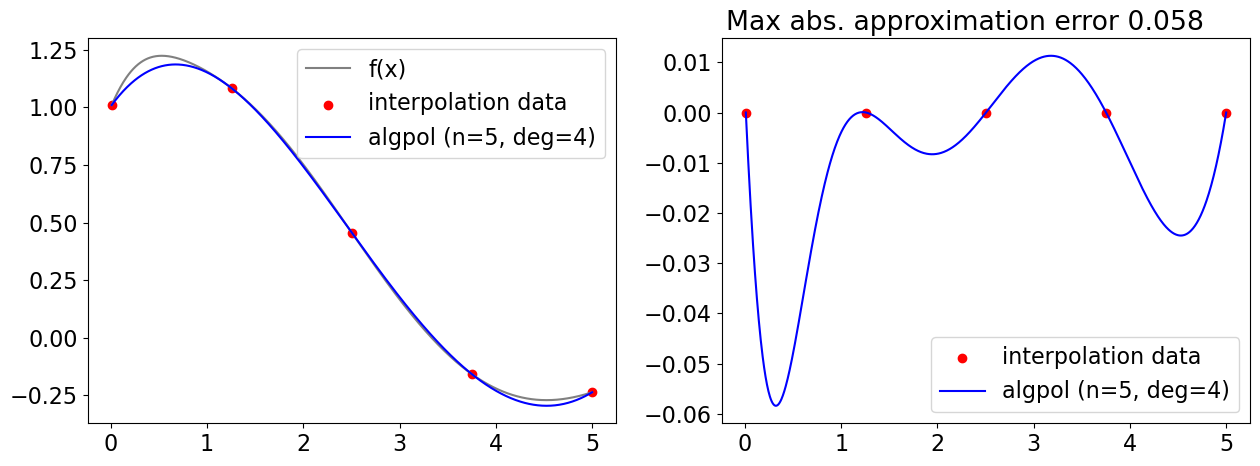

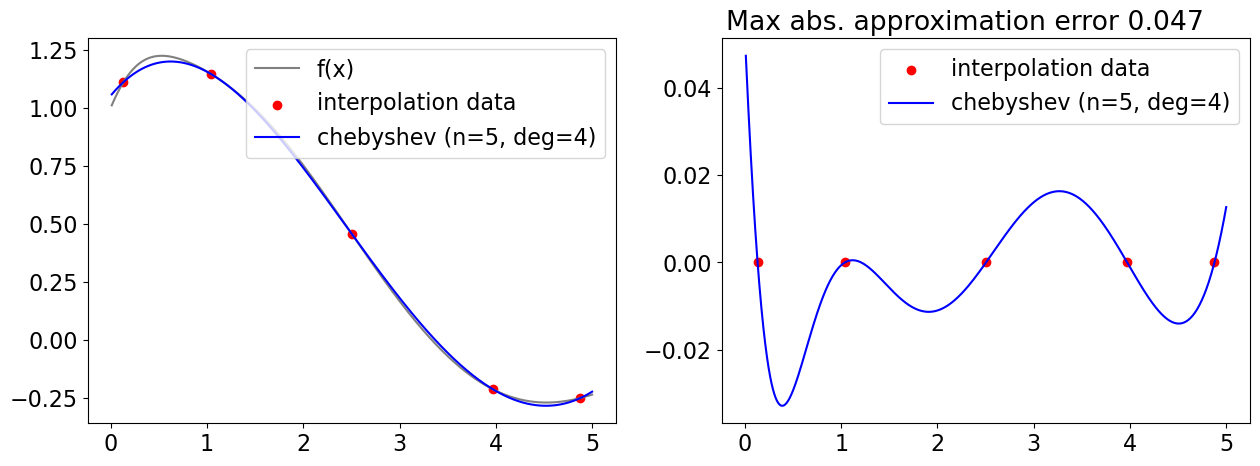

In [21]:
f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)    # function to interpolate/approximate
# f = lambda x: (np.log(x*2/3)+0.5*np.log(x*1/3))    # another function to approximate (only for x>0)
a=0.01; b=5; n=5; deg=4;
sa=sieve(n, deg, a, b, btype='algpol', gridtype='u');    sa.plot1d(f); plt.show() # basis: (ordinary) Algrbraic polynomials
sc=sieve(n, deg, a, b, btype='chebyshev', gridtype='c'); sc.plot1d(f); plt.show() # basis: Chebyshev polynomials

### Least squares approximation

We could also go back to **function approximation** and fit polynomials
of lower degree

- Data set $ \{(x_i,f(x_i)\}, i=1,\dots,m $  
- **Any** functional form $ g(x) $ from class $ G $ that best
  approximates $ f(x) $  


$$
g = \arg\min_{g \in G} \lVert f-g \rVert ^2
$$

### Orthogonal polynomial approximation/interpolation

- Polynomials over domain $ D $  
- Weighting function $ w(x)>0 $  


Inner product

$$
\langle f,g \rangle = \int_D f(x)g(x)w(x)dx
$$

$ \{\phi_i\} $ is a family of orthogonal polynomials w.r.t.
$ w(x) $ iff

$$
\langle \phi_i,\phi_j \rangle = 0, i\ne j
$$

#### Best polynomial approximation in L2-norm

Let $ \mathcal{P}_n $ denote the space of all polynomials of degree $ n $ over $ D $

$$
\lVert f - p \rVert_2 = \inf_{q \in \mathcal{P}_n} \lVert f - q \rVert_2
= \inf_{q \in \mathcal{P}_n}  \left[ \int_D ( f(x)-q(x) )^2 dx  \right]^{\tfrac{1}{2}}
$$

if and only if

$$
\langle f-p,q \rangle = 0, \text{ for all } q \in \mathcal{P}_n
$$

*Orthogonal projection is the best approximating polynomial in L2-norm*

#### Uniform (infinity, sup-) norm

$$
\lVert f(x) - g(x) \rVert_{\infty} = \sup_{x \in D} | f(x) - g(x) |
= \lim_{n \rightarrow \infty} \left[ \int_D ( f(x)-g(x) )^n dx  \right]^{\tfrac{1}{n}}
$$

Measures the maximum absolute difference over the whole domain $ D $

#### Chebyshev (minmax) approximation

What is the best polynomial approximation in the uniform (infinity, sup) norm?

$$
\lVert f - p \rVert_{\infty} = \inf_{q \in \mathcal{P}_n} \lVert f - q \rVert_{\infty}
= \inf_{q \in \mathcal{P}_n}  \sup_{x \in D} | f(x) - g(x) |
$$

Chebyshev proved existence and uniqueness of the best approximating polynomial in uniform norm.

#### Chebyshev polynomials

- $ [a,b] = [-1,1] $ and $ w(x)=(1-x^2)^{(-1/2)} $  
- $ T_n(x)=\cos\big(n\cos^{-1}(x)\big) $  

- Recursive formulas:  
$$
\begin{align}
T_0(x)=1,\\
T_1(x)=x,\\
T_{n+1}(x)=2x T_n(x) - T_{n-1}(x)
\end{align}
$$


- Chebyshev polynomials are mutually orthogonal wrt to the weighting function $w(x)=(1-x^2)^{(-1/2)}$ 

- If we approximate f(x) by Chebyshev-least squares, we put equal weight on where we want to minimize the squared error. 
- The leading term in the maximum error of a $n-1$ degree interpolation is $T_n(x)$
- If we want to achieve the best set of interpolation nodes that minimizes the maximum error bound for a degree $n-1$ interpolation, the interpolation nodes $x_1,\dots, x_n$ must be the zeros of $T_n(x)$
$$x_k=cos\left( \frac{2k-1}{2n}\pi\right), \quad \quad, k=1,\dots,n$$

### Let's compare basis for Chebyshev and Algebraic polynomials  

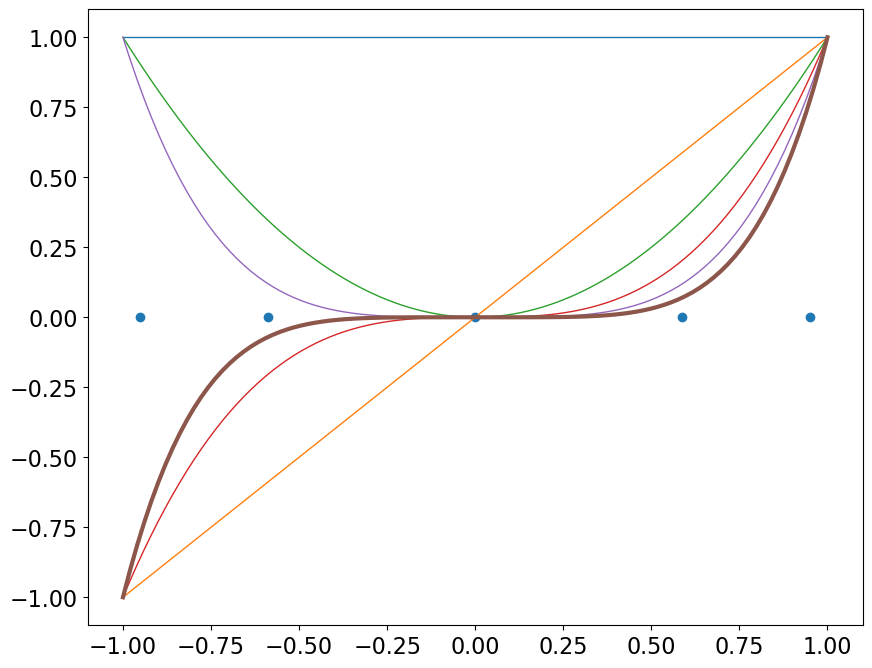

In [98]:
n=5
# plot nodes
x0,z0 =sieve.grid(n=n, a=0, b=1, gridtype='c') # chebyshev nodes are roots of n-degree chebyshev polynomials
plt.figure(figsize=(10,8))
plt.scatter(z0, z0*0)

# plot Chebyshev polynomials up to degree n
z=np.linspace(-1,1,100).reshape(-1,1)
B=sieve.basis_j(z, deg=n, btype='chebyshev') 
#B=sieve.basis(z, deg=[n], btype=['algpol']) # Try this and increase degree (does the polynobials appears to be orthogonal)
plt.plot(z, B[:,:-1], linewidth=1)
plt.plot(z, B[:,-1], linewidth=3)
plt.show()


### Are Chebyshev and Algebraic polynomials orthogonal

In [38]:
n=10;deg=n-1; 
sa=sieve(n, deg, a, b, btype='algpol', gridtype='u');    # basis: (ordinary) Algrbraic polynomials
sc=sieve(n, deg, a, b, btype='chebyshev', gridtype='c'); # basis: Chebyshev polynomials
print('Algebraic polynomials')
disp(sa.B.T@sa.B)
print('Chebyshev polynmials')
disp(sc.B.T@sc.B)


Algebraic polynomials
 10.0000   0.0000   4.0741  -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000 
  0.0000   4.0741  -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677 
  4.0741  -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000 
 -0.0000   2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997 
  2.9474  -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000 
 -0.0000   2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598 
  2.5043  -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000 
 -0.0000   2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000   2.0360 
  2.2863   0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000   2.0360   0.0000 
  0.0000   2.1677  -0.0000   2.0997   0.0000   2.0598   0.0000   2.0360   0.0000   2.0217 
Chebyshev polynmials
 10.0000  -0.0000  -0.0000   0.0000   0.0000  -

#### General interval

- Not hard to adapt the polynomials for the general interval
  $ [a,b] $ through linear change of variable  


$$
y = 2\frac{x-a}{b-a}-1
$$

- Orthogonality holds with weights function with the same change of
  variable  

#### Chebyshev approximation algorithm

1. Given $ f(x) $ and $ [a,b] $  
1. Compute Chebyshev interpolation nodes on $ [-1,1] $  
1. Adjust nodes to $ [a,b] $ by change of variable, $ x_i $  
1. Evaluate $ f $ at the nodes, $ f(x_i) $  
1. Compute Chebyshev coefficients $ a_i = g\big(f(x_i)\big) $  
1. Arrive at approximation  


$$
f(x) = \sum_{i=0}^n a_i T_i(x)
$$

#### Accuracy of Chebyshev interpolation

Suppose $ f: [-1,1]\rightarrow R $ is $ C^k $ function for some
$ k\ge 1 $, and let $ I_n $ be the degree $ n $ polynomial
interpolation of $ f $ with nodes at zeros of $ T_{n}(x) $.
Then

$$
\lVert f - I_n \rVert_{\infty} \le \left( \frac{2}{\pi} \log(n+1) +1 \right) \frac{(n-k)!}{n!}\left(\frac{\pi}{2}\right)^k \lVert f^{(k)}\rVert_{\infty}
$$

📖 Judd (1988) Numerical Methods in Economics

- achieves *best polynomial approximation in uniform norm*  
- works for smooth functions
- easy to compute  
- but *does not* approximate $ f'(x) $ well  

In [39]:
# compute factor proportional to ||f(k)|| appearing in error
import math
k=1
for n in range(k,k+5,1):
    z=(   (2/math.pi*math.log(n+1)+1)*(math.factorial(n-k)/math.factorial(n)*(math.pi/2)**k) ) /(math.factorial(2*n+1) * math.factorial(2*n)**2)
    print('k=', k, 'n=', n,  'z=', z)

k= 1 n= 1 z= 0.09433097947311841
k= 1 n= 2 z= 1.930995815583772e-05
k= 1 n= 3 z= 3.772661669497399e-10
k= 1 n= 4 z= 1.3477056153925123e-15
k= 1 n= 5 z= 1.279433480781732e-21


### Limits to polynomial interpolation/approximation 

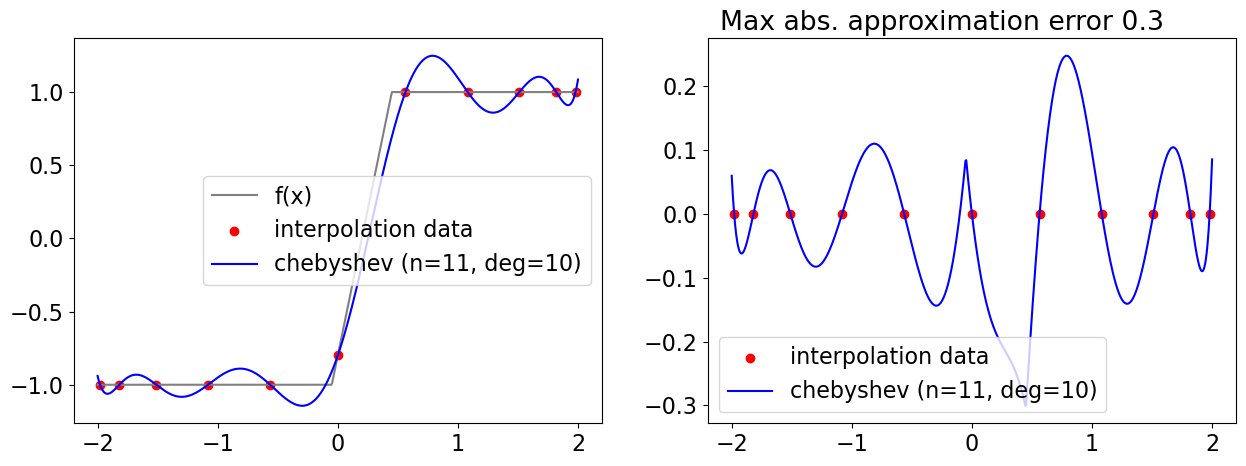

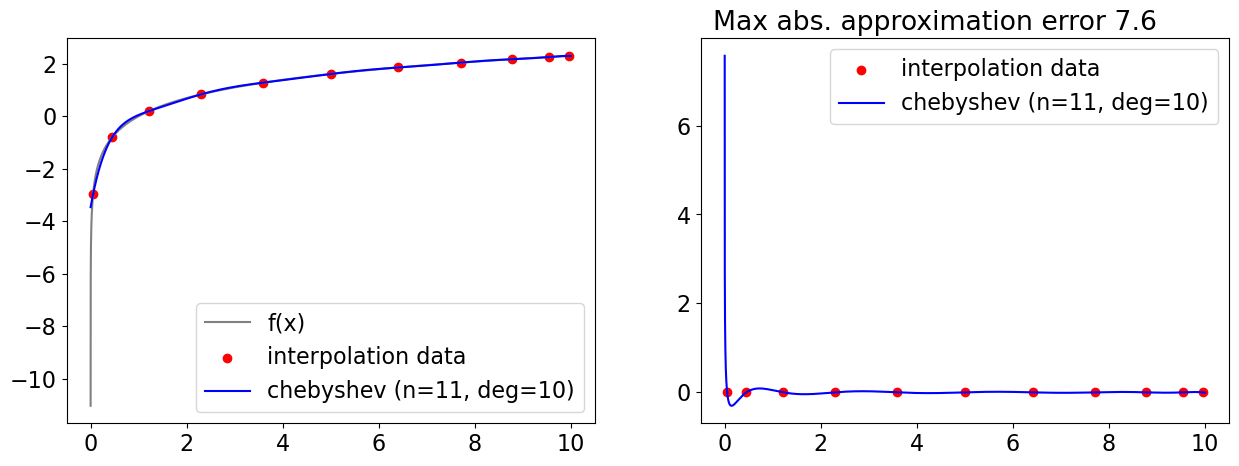

In [43]:
f1 = lambda x: np.minimum(np.maximum(4*(x-0.2),-1),1)   # function to approximate (for a=-1,b=1)
#f1= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)       # function to interpolate/approximate (smooth on small intervals)
f2 = lambda x: np.log(x)                               # function to approximate (only for x>0)
deg=10; n=deg+1;    # Try increasing degree and number of nodes
btype='chebyshev'; gridtype='c'; # 
# btype='algpol'; gridtype='u'; # Try algpol
s1=sieve(n, deg, a=-2, b=2,   btype=btype, gridtype=gridtype);  
s2=sieve(n, deg, a=0.00001, b=10, btype=btype, gridtype=gridtype);  
s1.plot1d(f1); plt.show() # basis: Chebyshev polynomials 
s2.plot1d(f2); plt.show() # basis: (ordinary) Algrbraic polynomials

### Transformation

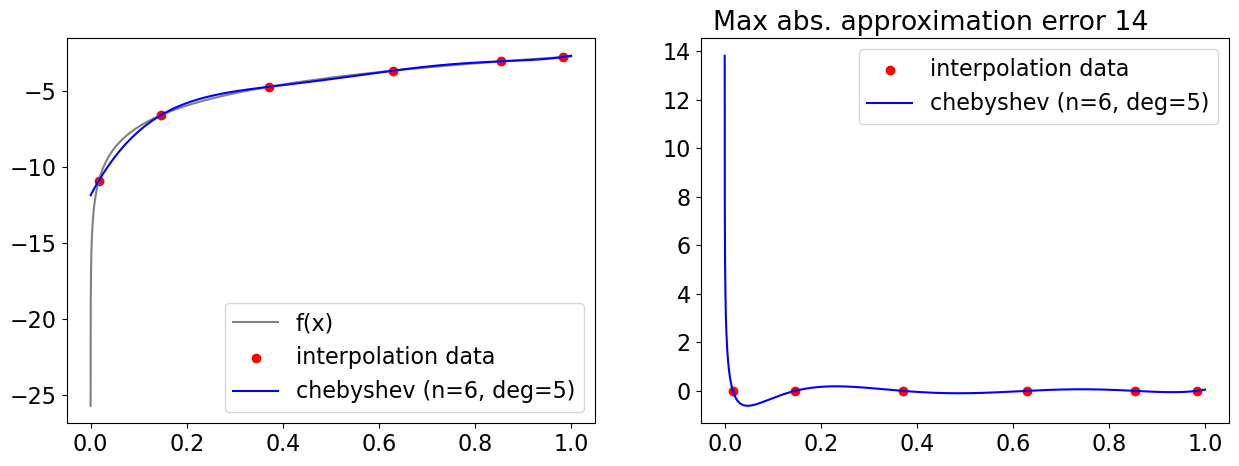

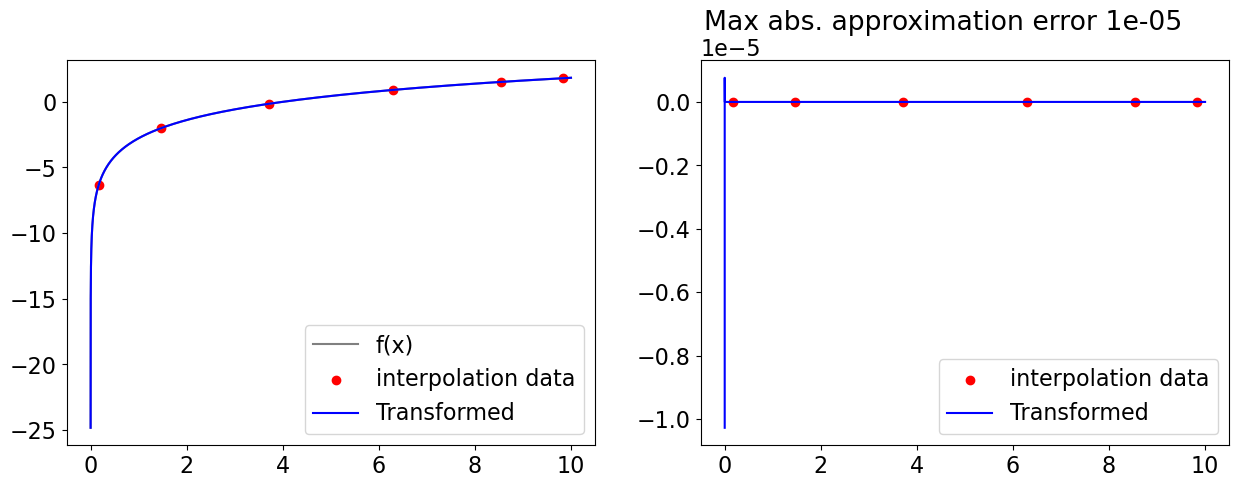

In [44]:
deg=5; n=deg+1;    # Try increasing degree and number of nodes
f1 = lambda x: np.log(x)  # function to approximate (only for x>0)
β=0.5; V= lambda x: np.log(x)/(1-β) + np.log(1-β)/(1-β) + β *np.log(β)/((1-β)**2)
f1 = V # Value function for cake eating problem
btype='chebyshev'; gridtype='c'; # btype='algpol'; gridtype='u'; 
s=sieve(n, deg, a=0.00001, b=1, btype=btype, gridtype=gridtype);  
s_tr=sieve(n, deg, a=0.00001, b=10, btype=btype, gridtype=gridtype, \
           transform=lambda x: np.exp(x), inv_transform=lambda x: np.log(np.maximum(x, 1e-20)));  
s.plot1d(f1); plt.show() # basis: Chebyshev polynomials 
s_tr.plot1d(f1, label='Transformed'); plt.show() # basis: (ordinary) Algrbraic polynomials

### Extrapolation

Extrapolation is computing the approximated function outside of the
original data interval

**Should be avoided in general**

- Exact *only* when theoretical properties of the extrapolated function
  are known  
- Can be used with extreme caution and based on the analysis of the model  
- Always try to introduce wider bounds for the grid instead  

**NEVER extrapolate high degree polynomials.**: Nodes are like hands that tries to fix a wild snake. 

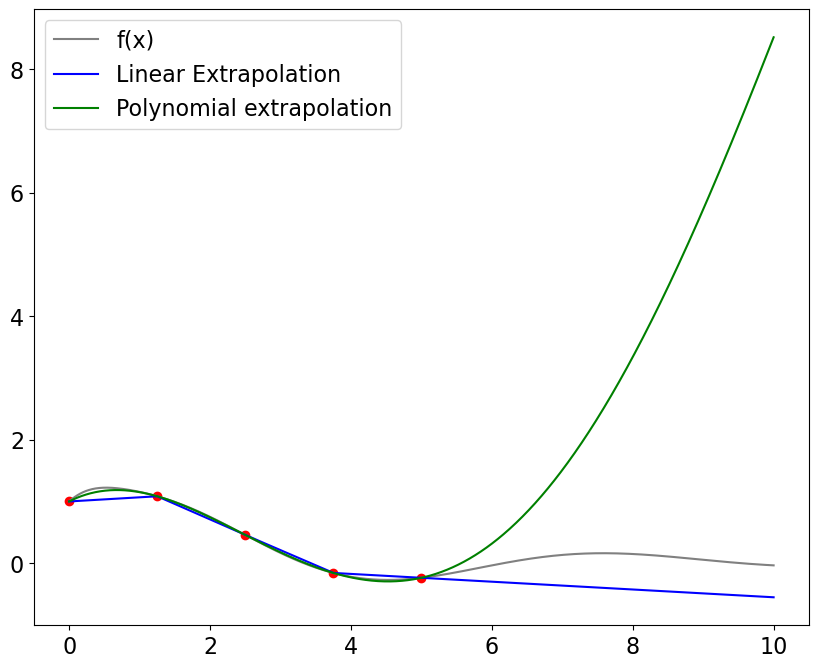

In [52]:
m=5; a=0; b=5; extrapolate=5            # try increasing m (does linear gets worse, does polynmial)               
x0 = np.linspace(a,b,m);                 # x0:  grid points where we know f(x)
x1 =  np.linspace(a,b+extrapolate,100);            # x1:  extended grid points for extrapolation
f= lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)       # function to interpolate/approximate (smooth on small intervals)
fhat = interpolate.interp1d(x0,f(x0), bounds_error=False, fill_value='extrapolate')    # returns the interpolation function
plot1d(None, x0, f(x0)) # use the the plotting tool
plot1d(f, x1, None, fhat, label='Linear Extrapolation') # use the the plotting tool

α = polynomial.polyfit(x0,f(x0),m-1)     # returns polynomial coeficients
fhat = lambda x: polynomial.polyval(x,α)
plot1d(None, x1, None, fhat, label='Polynomial extrapolation', color='g') # use the the plotting tool
    

### Spline interpolation

Spline = curve composed of independent pieces

**Definition** A function $ s(x) $ on $ [a,b] $ is a spline of
order $ n $ ( = degree $ n-1 $) iff

- $ s $ is $ C^{n-2} $ on $ [a,b] $ (has continuous derivatives
  up to order $ n-2 $),  
- given *knot* points $ a=x_0<x_1<\dots<x_m=b $, $ s(x) $ is a
  polynomial of degree $ n-1 $ on each subinterval
  $ [x_i,x_{i+1}] $, $ i=0,\dots,m-1 $  

#### Cubic splines = spline of order 4

- Data set $ \{(x_i,f(x_i), i=0,\dots,n\} $  
- Functional form $ s(x) = a_i + b_i x + c_i x^2 + d_i x^3 $ on
  $ [x_{i-1},x_i] $ for $ i=1,\dots,n $  
- $ 4n $ unknown coefficients:  
- $ 2n $ equations to make sure each segment passes through its interval points +
  $ 2(n-1) $ equations to ensure two continuous derivatives at each interior point  
- Additional 2 equation for the $ x_0 $ and $ x_n $  
  - $ s''(x_0)=s''(x_n)=0 $ (natural spline)  
  - $ s'(x_0)=\frac{s(x_1)-s(x_0)}{x_1-x_0} $,
    $ s'(x_n)=\frac{s(x_n)-s(x_{n-1})}{x_n-x_{n-1}} $
    (secant-Hermite)  

### B-splines
- B-splines play the role of basis functions for the spline function space, hence the name. 
- Expressions for the polynomial (all of same degree k) pieces can be derived by means of the Cox–de Boor recursion formula
$$ B_{i,0}(x):={\begin{cases}1&{\text{if }}t_{i}\leq x<t_{i+1},\\0&{\text{otherwise}}.\end{cases}}$$

$$B_{i,k}(x):={\frac {x-t_{i}}{t_{i+k}-t_{i}}}B_{i,k-1}(x)+{\frac {t_{i+k+1}-x}{t_{i+k+1}-t_{i+1}}}B_{i+1,k-1}(x).$$
- That is, $B_{j,0}(x)$ is piecewise constant one or zero indicating which knot span $x$ is in (zero if knot span j is repeated). 
- The recursion equation is in two parts, where
$${\frac {x-t_{i}}{t_{i+k}-t_{i}}}$$
ramps from zero to one as $x$ goes from $t_{i}$ to $t_{i+k}$, and $${\frac {t_{i+k+1}-x}{t_{i+k+1}-t_{i+1}}}$$ ramps from one to zero as x goes from 
$t_{i+1}$ to $t_{i+k+1}$. 

### B-splines  - basis functions

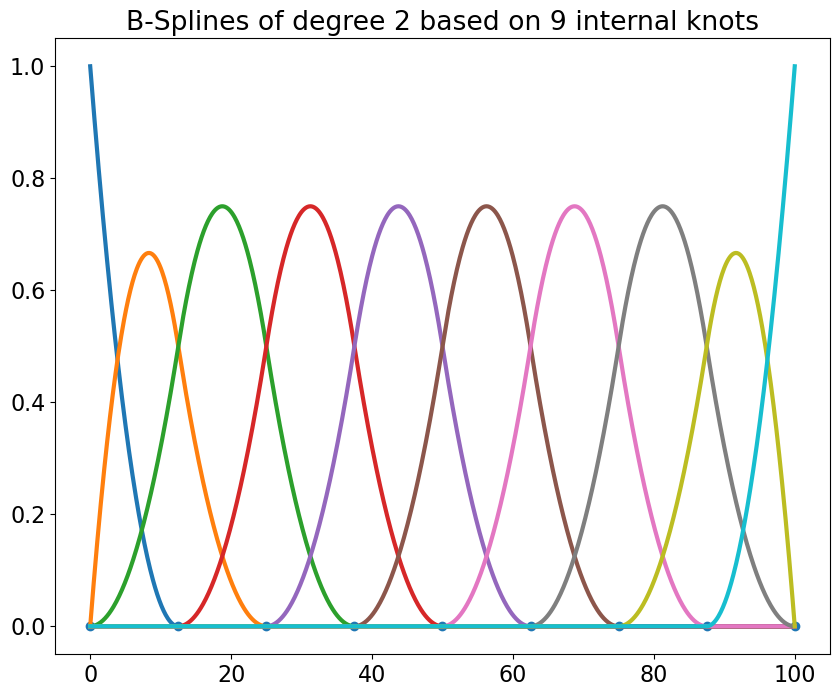

In [84]:
k=2                           # polynomial degree (Try 0,1,2,)
nknots=9                     # number of internal knots (Try)
a=0; b=100;                    # min and max
knots=np.linspace(a,b,nknots)  # internal knots
x=np.linspace(a,b,1000)        # evaluation point for plotting
B=sieve.basis_j(x, deg=k, btype='b-spline', knots=knots) 
plt.figure(figsize=(10,8))
plt.scatter(knots, knots*0)
plt.plot(x, B, linewidth=3)
plt.title('B-Splines of degree %d based on %d internal knots'% (k,nknots))
plt.show()

### B-splines versus Chebyshev 

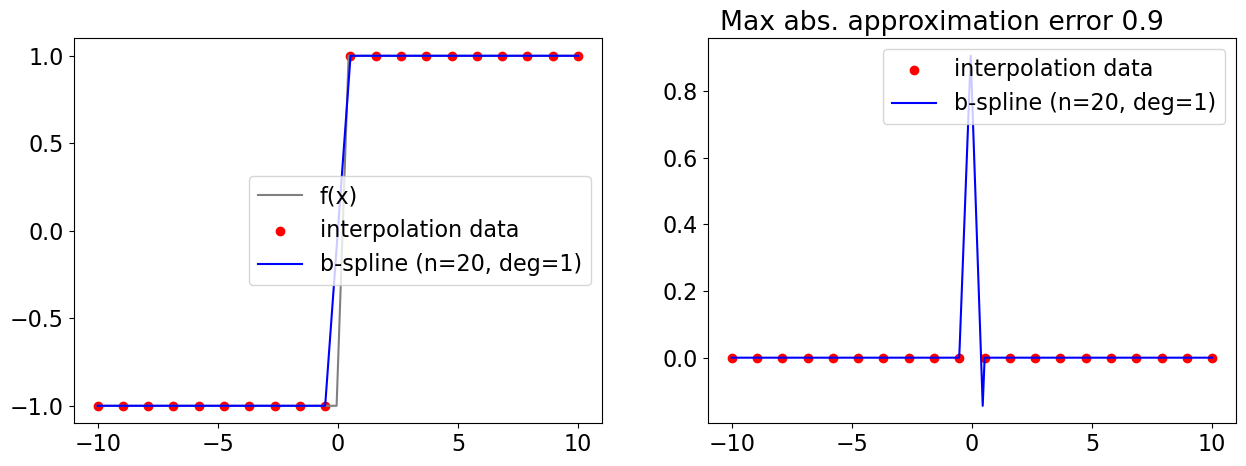

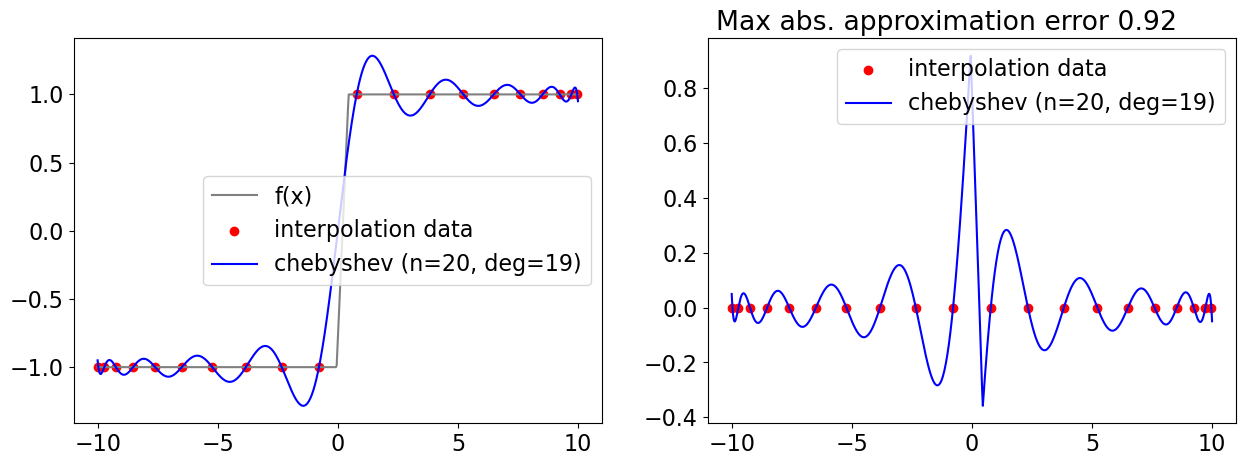

In [67]:
a=-10; b=10; f = lambda x: np.minimum(np.maximum(4*(x-0.2),-1),1)   # "kinky" function to approximate (for a=-1,b=1)
#a=-1; b=1; f = lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2)      # smooth function 
n=20; deg_spl=1; # Try chnaging degree of spline, addining more points and change interval.  
sb=sieve(n, deg_spl, a, b, btype='b-spline', gridtype='u', nknots=None);      sb.plot1d(f); plt.show() # basis: B-spline
sc=sieve(n, n-1, a, b, btype='chebyshev', gridtype='c');   sc.plot1d(f); plt.show() # basis: Chebyshev polynomials

### Multidimensional interpolation/approximation

- there are multidimensional generalization to all methods based on sieves  
- We consider a tensor product basis: curse of dimensionality in the number of interpolation points when number of dimensions increase  

**Generally much harder!**

### We can do it: Let's try a tensor product basis of Chebyshev polynomials

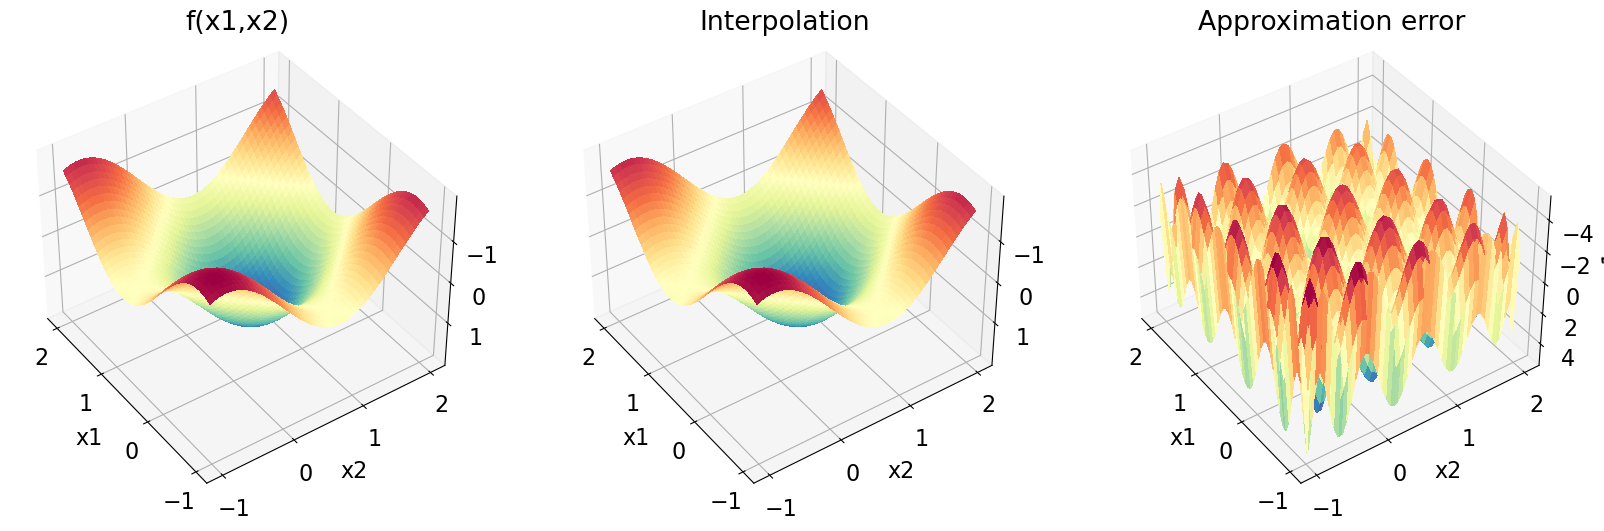

In [85]:
f1 = lambda x: np.sin(np.sum(x, axis=1)).reshape(-1,1)           # smooth function with some nonlinear interaction
f1 = lambda x: np.sum(np.sin(2*x), axis=1).reshape(-1,1)         # additively seperable smooth function
#f1 = lambda x: np.log(np.sum(np.abs(x), axis=1)).reshape(-1,1)  # nasty fuction
s1=sieve(n=[11, 11], a=-1, b=2, btype='chebyshev', gridtype='c') # sieve setup
fx=f1(s1.x)        # y-data at nodes s1.x
α = s1.fit(fx)     # sieve coeficients             

neval=[50,50]      # evaluation of function and interpolant on finer grid  
x, z=sieve.grid(n=neval, a=s1.a, b=s1.b, gridtype='u')
fhat=s1.eval(x, α)

# plotting
fig=plot2d(x,f1(x), neval, i=1)
fig=plot2d(x,fhat, neval, fig=fig, i=2, label='Interpolation')
fig=plot2d(x,fhat-f1(x), neval, fig=fig, i=3, label='Approximation error')

### Approximation in $R^d$
Recall our sieve approximation in the 1-dimensional case
$$f(x) \approx s(x,\alpha)= \sum_{j=0}^{n} \alpha_j B_j(x) $$
where 
- $B_j(x)=B_{j,k}(x)$ for the B-Spline of degree $k$ for interval $j$ (sorry for using same notation for B splines and Basis functions)
- $B_j(x)=B_{j,0}(x)=\mathbb{1}(x_j\le x < x_{j+1}) $ the step-function (B-spline of degree 0 for interval j)
- $B_j(x)=x^j$ for a simple algebraic polynomial of degree $j$ 
- $B_j(x)=T_j(x)$ for Chebyshev polynomials of degree $j$

This formula can be directly generalized to d dimensions:
$$f(x_1,\dots,x_d) \approx s(x_1,\dots,x_d,\alpha)=  \sum_{i_1=0}^{n_1} \dots \sum_{i_d=0}^{n_d}  \alpha_{i_1\dots 
i_d} \prod_{k=1}^d B_{i_k}(x_{k})$$
For d=2 we have
$$f(x_1,x_2) \approx s(x_1,x_2,\alpha)=  \sum_{i_1=0}^{n_1} \sum_{i_2=0}^{n_2}  \alpha_{i_1,
i_2}  B_{i_1}(x_{1}) B_{i_2}(x_{2})$$

### Looks nasty, but is quite easy with matrix notation
$$f(x_1,\dots,x_d)=\mathbf{B(x)}\alpha$$ 
where 
- $\mathbf{B(x)}$ is the matrix with as many rows as we have grid-points and as many columns as we cam make combinations of basis functions across the $d$ dimensions d with $n_d+1$ basis functions in each dimension. 
- $\mathbf{B(x)}$ has $\prod_{k=1}^d (n_d+1)$ columns.
- $\alpha$ is a vector of coefficients with $\prod_{k=1}^d (n_d+1)$ rows
- To identify all coefficients we need at least $\prod_{k=1}^d (n_d+1)$ DISTRICT points on our grid. We can this as the so called Cartesian grid that gives all combinations of gridpoints used in dimensions $k=1,\dots,d$

### .... and even easier in Python. Let's first do the Cartesian grid

In [86]:
def cartesian(x):
    d=len(x)
    return np.array(np.meshgrid(*x)).T.reshape(-1,d)

x1=np.linspace(1,2,2); x2=np.linspace(3,5,3);  x=[x1, x2]; 
X=cartesian(x)
print('x1=', x1)
print('x2=', x2)
print('X', X)
disp(X)


x1= [1. 2.]
x2= [3. 4. 5.]
X [[1. 3.]
 [1. 4.]
 [1. 5.]
 [2. 3.]
 [2. 4.]
 [2. 5.]]
  1.0000   3.0000 
  1.0000   4.0000 
  1.0000   5.0000 
  2.0000   3.0000 
  2.0000   4.0000 
  2.0000   5.0000 


### .... and and now the d fold tensor product basis

In [87]:
def tensor(b): 
    '''k-fold tensor product list of matrices b=[b[0],b[1],...,b[k-1]]'''
    T=b[0]   # Initialize Tensor product basis with first element in b 
    for j in range(len(b)-1): # loop over remainng dimensions in b
        T=(T[:,:,None]*b[j+1][:,None,:]).reshape(T.shape[0],-1)  # use boradcasting
    return T

B1=sieve.basis_j(X[:,0], deg=2, btype='algpol')
B2=sieve.basis_j(X[:,1], deg=2, btype='algpol')

print('B1'); disp(B1)
print('B2'); disp(B2)

T=tensor([B1,B2])
print('T', T.shape); disp(T)

B1
  1.0000   1.0000   1.0000 
  1.0000   1.0000   1.0000 
  1.0000   1.0000   1.0000 
  1.0000   2.0000   4.0000 
  1.0000   2.0000   4.0000 
  1.0000   2.0000   4.0000 
B2
  1.0000   3.0000   9.0000 
  1.0000   4.0000  16.0000 
  1.0000   5.0000  25.0000 
  1.0000   3.0000   9.0000 
  1.0000   4.0000  16.0000 
  1.0000   5.0000  25.0000 
T (6, 9)
  1.0000   3.0000   9.0000   1.0000   3.0000   9.0000   1.0000   3.0000   9.0000 
  1.0000   4.0000  16.0000   1.0000   4.0000  16.0000   1.0000   4.0000  16.0000 
  1.0000   5.0000  25.0000   1.0000   5.0000  25.0000   1.0000   5.0000  25.0000 
  1.0000   3.0000   9.0000   2.0000   6.0000  18.0000   4.0000  12.0000  36.0000 
  1.0000   4.0000  16.0000   2.0000   8.0000  32.0000   4.0000  16.0000  64.0000 
  1.0000   5.0000  25.0000   2.0000  10.0000  50.0000   4.0000  20.0000 100.0000 


### Before we look at coefficients let's consider our 2-d Chebyshev approximation from before

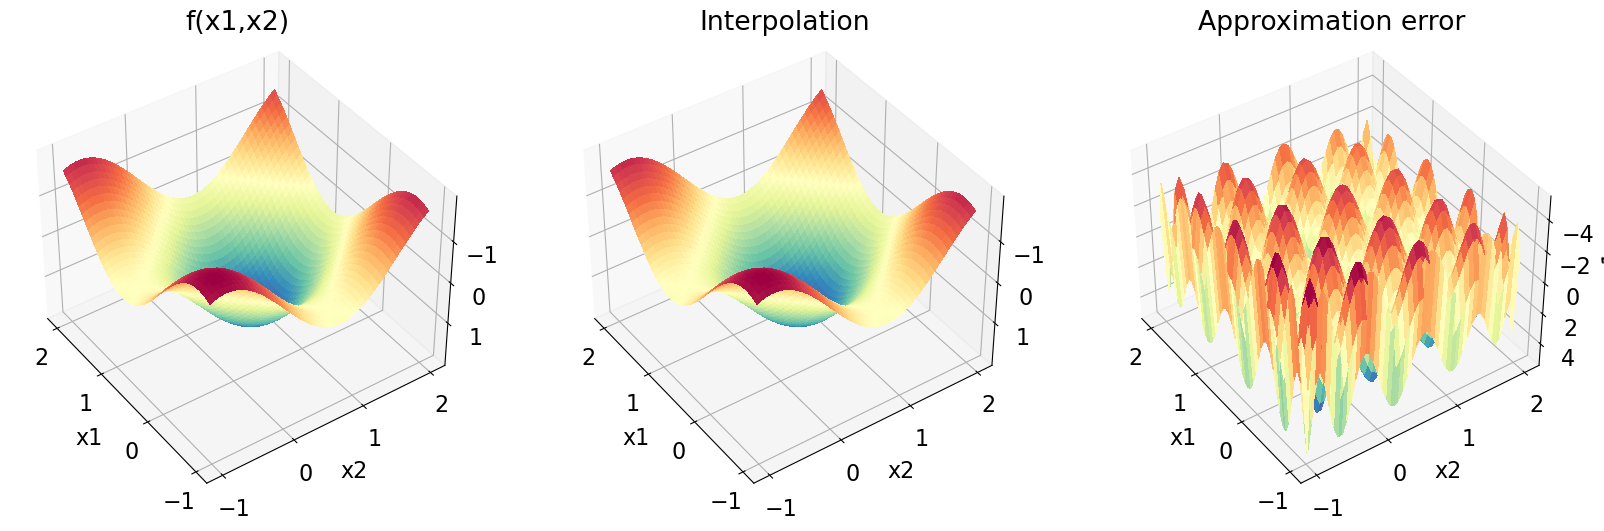

In [88]:
# f1 = lambda x: np.sin(np.sum(x, axis=1)).reshape(-1,1)         # smooth function with some nonlinear interaction (TRY and inspect coefficnets on next slide)
f1 = lambda x: np.sum(np.sin(2*x), axis=1).reshape(-1,1)         # additively seperable smooth function (TRY and inspect coefficnets on next slide)
#f1 = lambda x: np.log(np.sum(np.abs(x), axis=1)).reshape(-1,1)  # nasty fuction
s1=sieve(n=[11, 11], a=-1, b=2, btype='chebyshev', gridtype='c') # sieve setup
fx=f1(s1.x)        # y-data at nodes s1.x
α = s1.fit(fx)     # sieve coeficients             

neval=[50,50]      # evaluation of function and interpolant on finer grid  
x, z=sieve.grid(n=neval, a=s1.a, b=s1.b, gridtype='u')
fhat=s1.eval(x, α)

# plotting
fig=plot2d(x,f1(x), neval, i=1)
fig=plot2d(x,fhat, neval, fig=fig, i=2, label='Interpolation')
fig=plot2d(x,fhat-f1(x), neval, fig=fig, i=3, label='Approximation error')

### How does the coefficients look like?  

In [89]:
# Try to inspect coefficients when approximating function with dependence x1 and x2 
# (use one of the alternative functions just above)
print('Transposed coefficients')
disp(α.reshape(s1.deg[0]+1,s1.deg[1]+1)) 

Transposed coefficients
 -0.4377   0.3664  -0.8181  -0.3340   0.2222   0.0465  -0.0192  -0.0028   0.0008   0.0001  -0.0000 
  0.3664   0.0000   0.0000  -0.0000   0.0000  -0.0000  -0.0000  -0.0000   0.0000  -0.0000   0.0000 
 -0.8181   0.0000  -0.0000  -0.0000  -0.0000   0.0000   0.0000   0.0000   0.0000  -0.0000  -0.0000 
 -0.3340  -0.0000   0.0000  -0.0000  -0.0000   0.0000   0.0000  -0.0000  -0.0000   0.0000   0.0000 
  0.2222   0.0000  -0.0000   0.0000  -0.0000   0.0000  -0.0000  -0.0000   0.0000  -0.0000   0.0000 
  0.0465  -0.0000   0.0000   0.0000  -0.0000   0.0000   0.0000   0.0000   0.0000   0.0000  -0.0000 
 -0.0192   0.0000   0.0000  -0.0000   0.0000  -0.0000   0.0000   0.0000  -0.0000   0.0000  -0.0000 
 -0.0028  -0.0000  -0.0000   0.0000   0.0000   0.0000  -0.0000   0.0000  -0.0000   0.0000   0.0000 
  0.0008   0.0000  -0.0000   0.0000   0.0000  -0.0000  -0.0000   0.0000   0.0000  -0.0000   0.0000 
  0.0001   0.0000  -0.0000   0.0000  -0.0000   0.0000   0.0000   0.0000  -0.

### Let's try a tensor product basis of B-splines

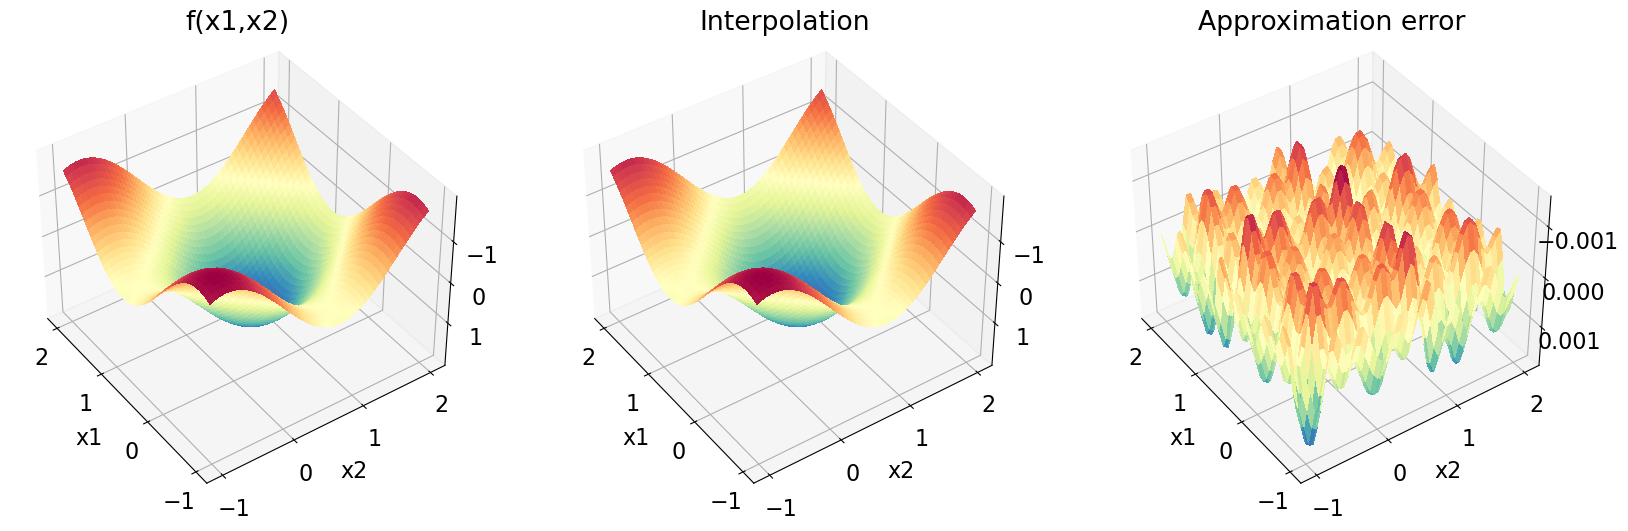

In [90]:
f1 = lambda x: np.sin(np.sum(x, axis=1)).reshape(-1,1)           # smooth function with some nonlinear interaction
f1 = lambda x: np.sum(np.sin(2*x), axis=1).reshape(-1,1)         # additively seperable smooth function
#f1 = lambda x: np.log(np.sum(np.abs(x), axis=1)).reshape(-1,1)  # nasty fuction
s1=sieve(n=[11, 11], deg=[3], a=-1, b=2, btype=['b-spline'], gridtype=['u']) # sieve setup - try different defgrees
#s1=sieve(n=[11, 11], deg=[3,10], a=-1, b=2, btype=['b-spline','chebyshev'], gridtype=['u','c']) # sieve setup - try different defgrees
fx=f1(s1.x)        # y-data at nodes s1.x
α = s1.fit(fx)     # sieve coeficients             

neval=[50,50]      # evaluation of function and interpolant on finer grid  
x, z=sieve.grid(n=neval, a=s1.a, b=s1.b, gridtype='u')
fhat=s1.eval(x, α)

# plotting
fig=plot2d(x,f1(x), neval, i=1)
fig=plot2d(x,fhat, neval, fig=fig, i=2, label='Interpolation')
fig=plot2d(x,fhat-f1(x), neval, fig=fig, i=3, label='Approximation error')

### Coefficients for Spline approximation is dense

In [20]:
print('Transposed coefficients')
disp(α.reshape(s1.nknots[0]+2,s1.nknots[1]+2)) 
     

Transposed coefficients
 -1.8186  -1.9221  -1.9525  -1.4364  -0.6368   0.0145   0.1720  -0.2510  -1.0291  -1.5028  -1.6661 
 -1.9221  -2.0257  -2.0560  -1.5400  -0.7404  -0.0891   0.0684  -0.3546  -1.1326  -1.6063  -1.7696 
 -1.9525  -2.0560  -2.0863  -1.5703  -0.7707  -0.1194   0.0381  -0.3849  -1.1630  -1.6366  -1.8000 
 -1.4364  -1.5400  -1.5703  -1.0543  -0.2547   0.3966   0.5541   0.1311  -0.6469  -1.1206  -1.2839 
 -0.6368  -0.7404  -0.7707  -0.2547   0.5449   1.1962   1.3537   0.9307   0.1527  -0.3210  -0.4843 
  0.0145  -0.0891  -0.1194   0.3966   1.1962   1.8475   2.0050   1.5820   0.8040   0.3303   0.1670 
  0.1720   0.0684   0.0381   0.5541   1.3537   2.0050   2.1625   1.7395   0.9615   0.4878   0.3245 
 -0.2510  -0.3546  -0.3849   0.1311   0.9307   1.5820   1.7395   1.3165   0.5385   0.0648  -0.0985 
 -1.0291  -1.1326  -1.1630  -0.6469   0.1527   0.8040   0.9615   0.5385  -0.2396  -0.7133  -0.8766 
 -1.5028  -1.6063  -1.6366  -1.1206  -0.3210   0.3303   0.4878   0.0648  -0.

### Curse of dimensionality
- It may be easy to program, but the tensor product basis i subject to **CURSE OF DIMENSIONALITY**. 
- The number of basis functions, corresponding coefficients and required nodes are all exponentially increasing in $d$
- Sparse Smolyak grids and adaptive sparse grids  
- Do we need the regular Cartesian grid
- Perhaps randomization can break the curse of dimensionality
- Irregular grids require computationally expensive triangulation in the general case
- Good application for machine learning!  

### Further learning resources

- [https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)  
- [https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html](https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html)  
- M.H. Mudde’s thesis on Chebyshev approximation [http://fse.studenttheses.ub.rug.nl/15406/1/Marieke_Mudde_2017_EC.pdf](http://fse.studenttheses.ub.rug.nl/15406/1/Marieke_Mudde_2017_EC.pdf)  

# Some calls and illustrations using build in Python routines in 1d


In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2008) # fix random number sequences
x  = np.sort(np.random.uniform(-5,10,12)) # sorted random numbers on [-5,10]
xr = np.linspace(-5,10,12) # regular grid on [-5,10]

func=lambda x: np.exp(-x/4)*np.sin(x) + 1/(1+x**2) # function to interpolate

In [92]:
def plot1(ifunc,fdata=(x,func(x)),f=func,color='b',label='',extrapolation=False):
    '''helper function to make plots'''
    xd = np.linspace(-5,10,1000) # for making continuous lines
    plt.figure(num=1, figsize=(10,8))
    plt.scatter(fdata[0],fdata[1],color='r') # interpolation data
    plt.plot(xd,f(xd),color='grey') # true function
    if extrapolation:
        xdi = xd
    else:
        # restriction for interpolation only
        xdi=xd[np.logical_and(xd>=fdata[0][0],xd<=fdata[0][-1])]
    if ifunc:
        plt.plot(xdi,ifunc(xdi),color=color,label=label)
        if label:
            plt.legend()
    elif label:
        plt.title(label)

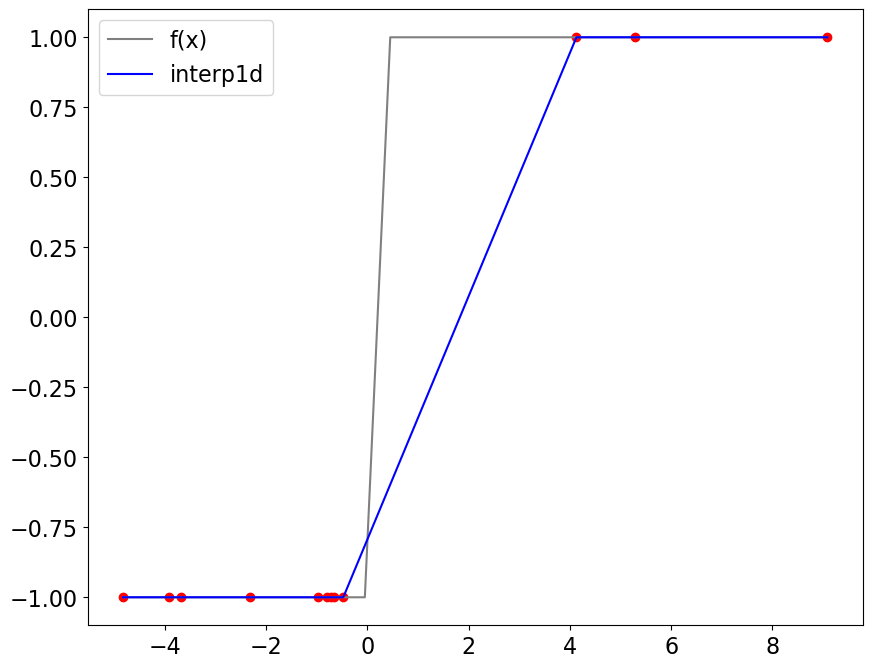

In [93]:
from scipy import interpolate # Interpolation routines
fhat = interpolate.interp1d(x,f(x)) # returns the interpolation function
plot1d(f, x, f(x), fhat,label='interp1d')

In [94]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadra

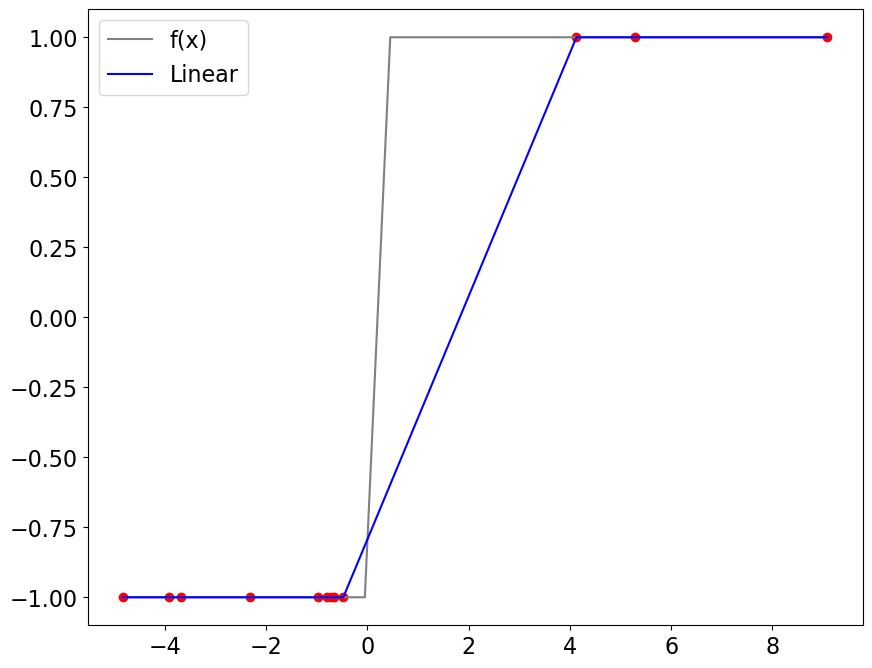

In [95]:
fhat = interpolate.interp1d(x,f(x),kind='linear')
plot1d(f, x, f(x), fhat,label='Linear')

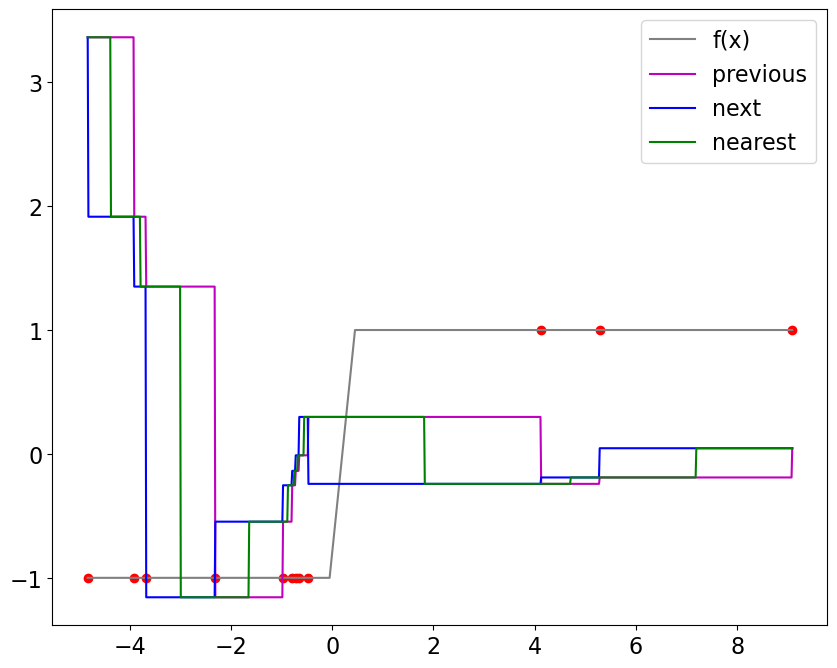

In [96]:
plot1d(f, x, f(x))
for knd, clr in ('previous','m'),('next','b'),('nearest','g'):
    fhat = interpolate.interp1d(x,func(x),kind=knd)
    plot1d(x0=x, fhat=fhat, label=knd,color=clr)
plt.show()

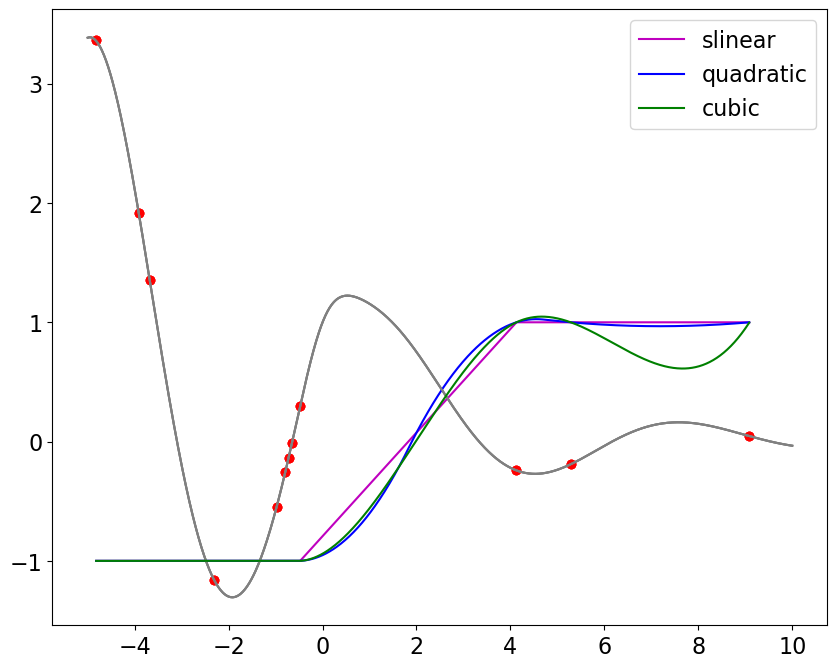

In [27]:
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,f(x),kind=knd)
    plot1(fi,color=clr,label=knd)

Max error with  slinear splines is 7.87872e-01
Max error with  quadratic splines is 5.17170e-01
Max error with  cubic splines is 5.06893e-01


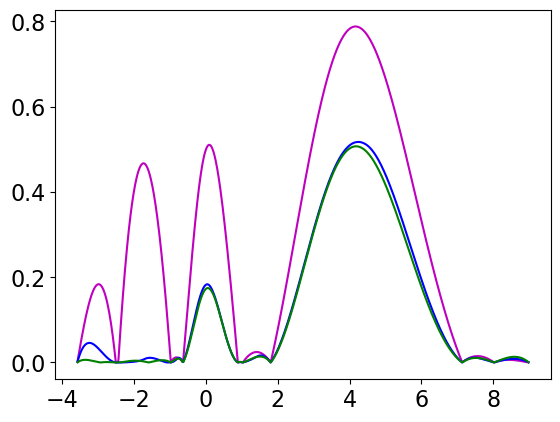

In [97]:
# Approximation errors
x = np.sort(np.random.uniform(-5,10,11))  # generate new data
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

Max error with  slinear splines is 4.63043e-01
Max error with  quadratic splines is 3.48546e-01
Max error with  cubic splines is 1.89578e-01


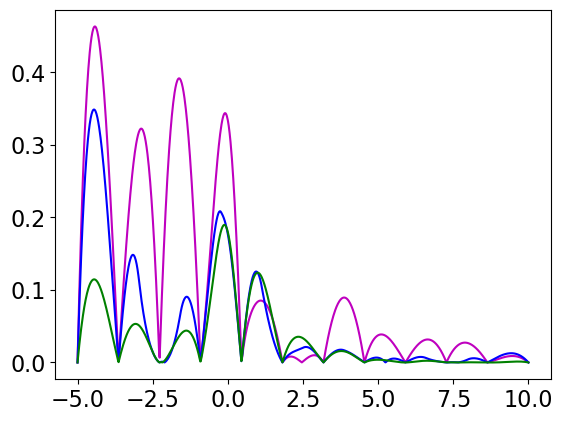

In [29]:
# Approximation errors for regular grid
for knd, clr in ('slinear','m'),('quadratic','b'),('cubic','g'):
    fi = interpolate.interp1d(xr,func(xr),kind=knd,bounds_error=False)
    xd = np.linspace(-5,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.plot(xd,erd,color=clr)
    print('Max error with  %s splines is %1.5e'%(knd,np.nanmax(erd)))

#### Accuracy of the interpolation

How to reduce approximation errors?

- Number of nodes (more is better)  
- Location of nodes (regular is better)  
- Interpolation type (match function of interest)  


*In economic models we usually can control all of these*

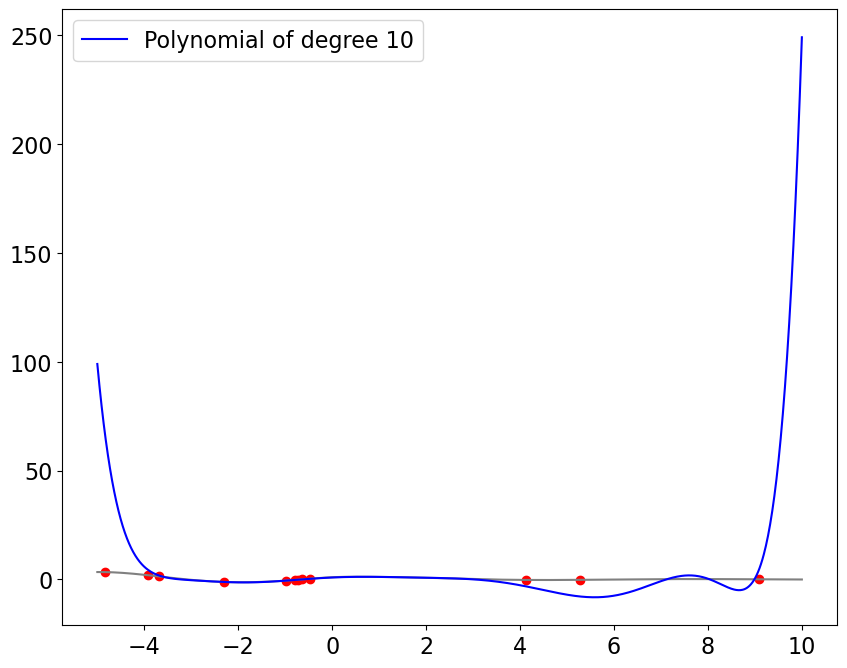

In [30]:
from numpy.polynomial import polynomial
degree = len(x)-1 # passing through all dots
p = polynomial.polyfit(x,func(x),degree)
fi = lambda x: polynomial.polyval(x,p)
plot1(fi,label='Polynomial of degree %d'%degree,extrapolation=True)

(12,)


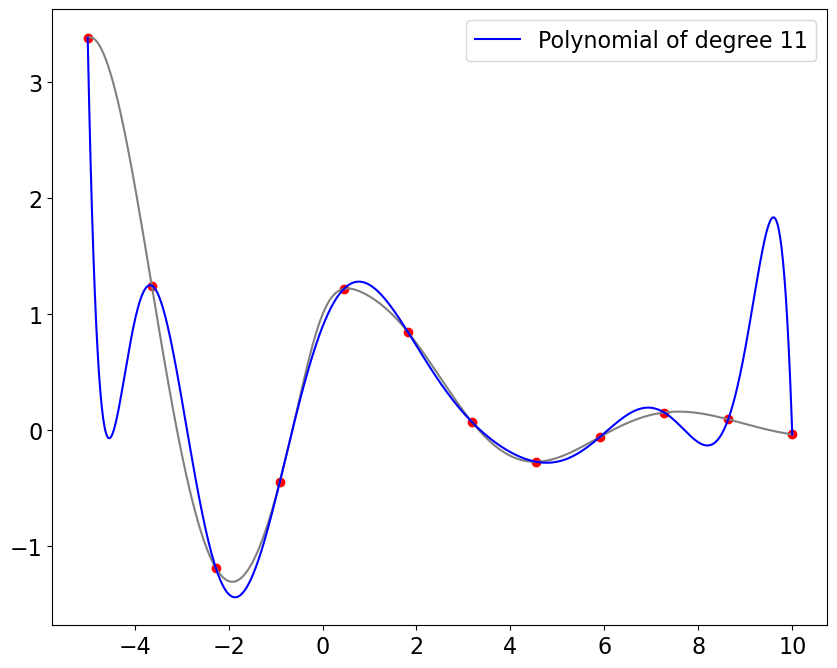

In [31]:
# now with regular grid
degree = len(xr)-1 # passing through all dots
p = polynomial.polyfit(xr,func(xr),degree)
print(p.shape)
fi = lambda x: polynomial.polyval(x,p)
plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,extrapolation=True)

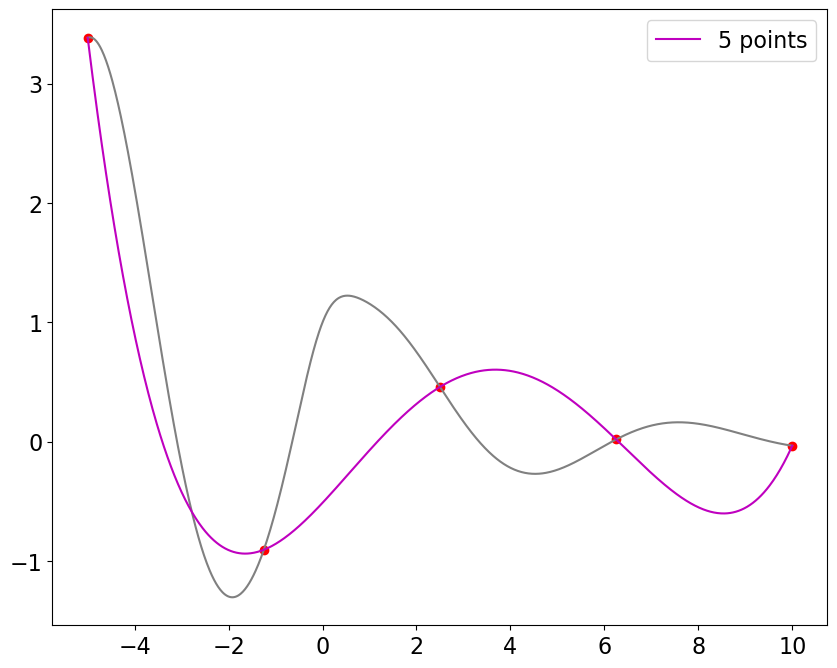

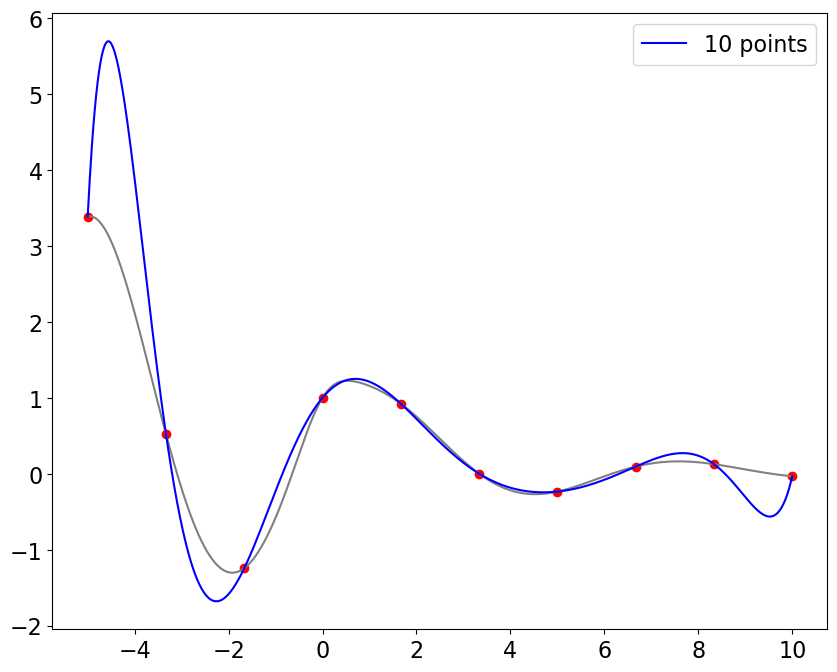

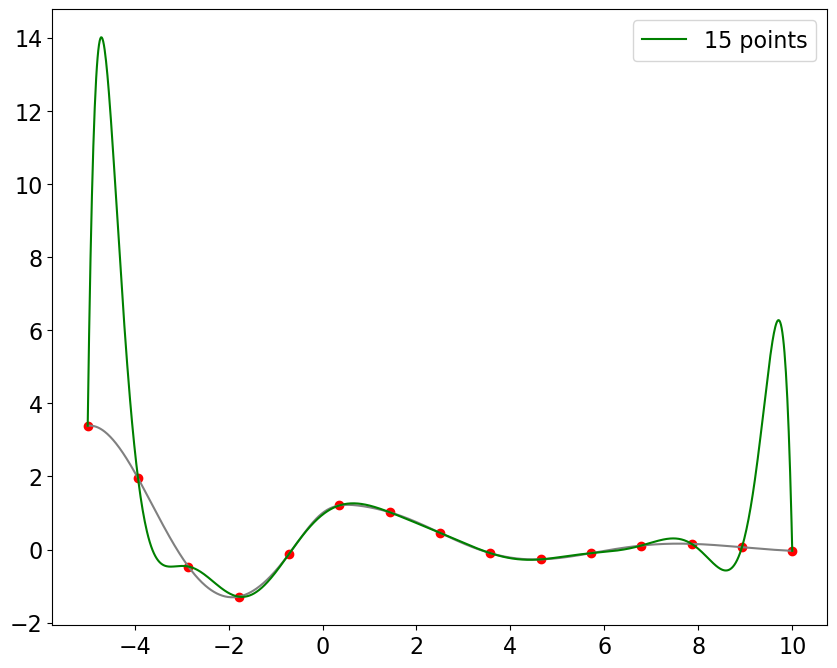

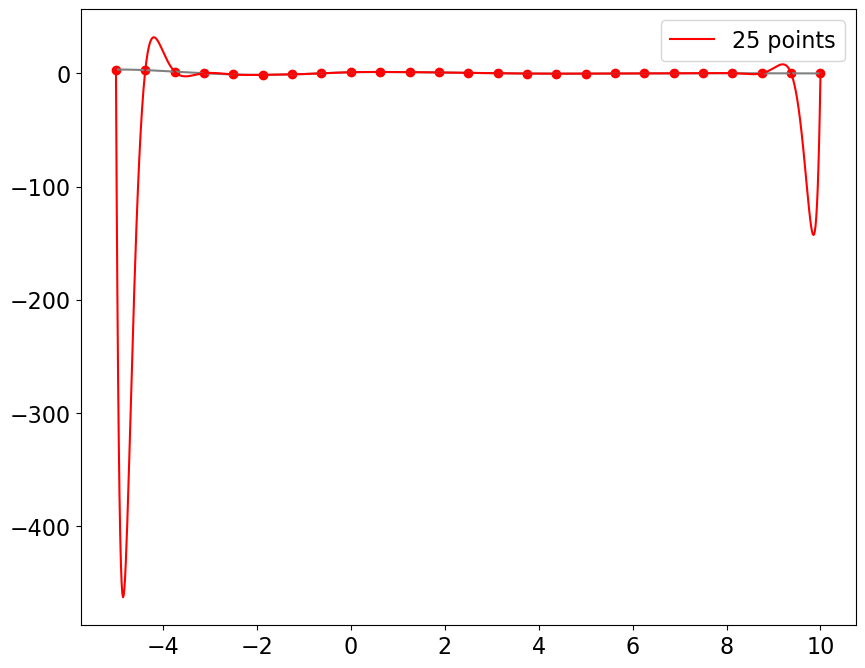

In [32]:
# how number of points affect the approximation (with degree=n-1)
for n, clr in (5,'m'),(10,'b'),(15,'g'),(25,'r'):
    x2 = np.linspace(-5,10,n)
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()

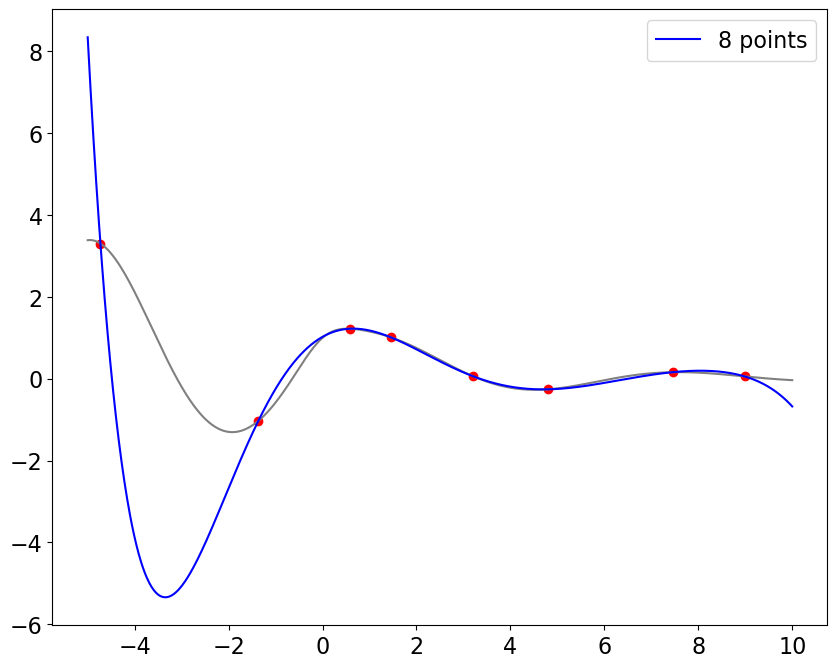

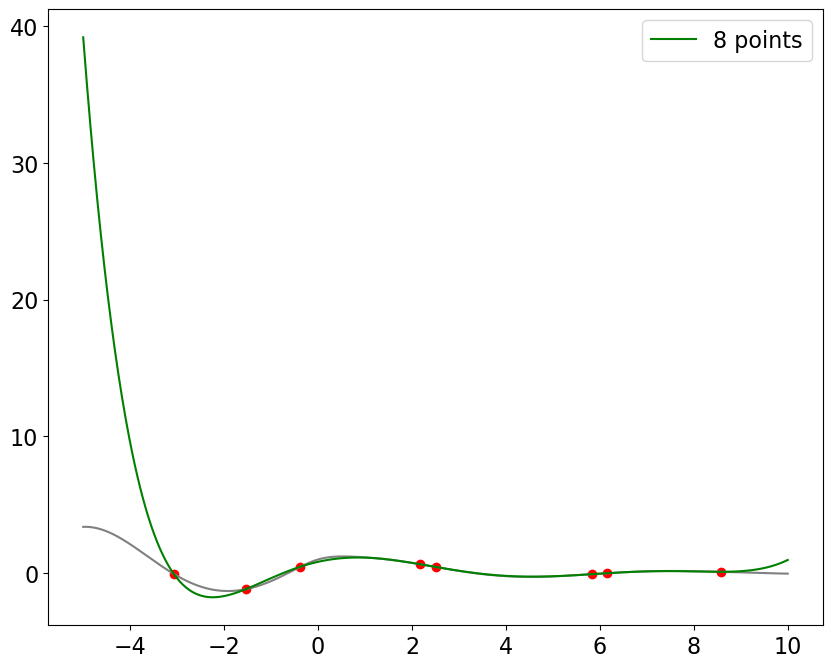

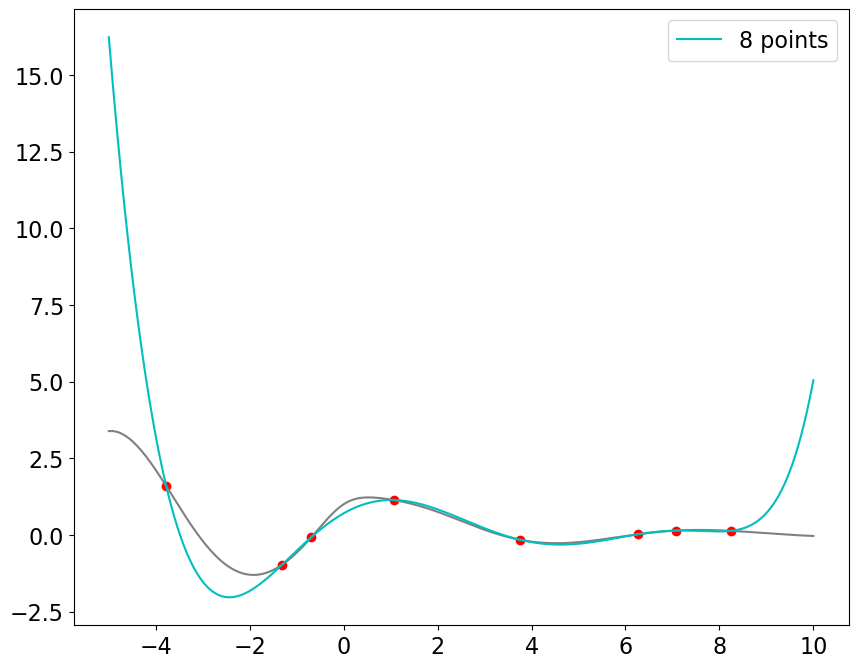

In [33]:
# how locations of points affect the approximation (with degree=n-1)
np.random.seed(2025)
n=8
for clr in 'b','g','c':
    x2 = np.linspace(-4,9,n) + np.random.uniform(-1,1,n) # perturb points a little
    p = polynomial.polyfit(x2,func(x2),n-1)
    fi = lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(x2,func(x2)),label='%d points'%n,color=clr,extrapolation=True)
    plt.show()

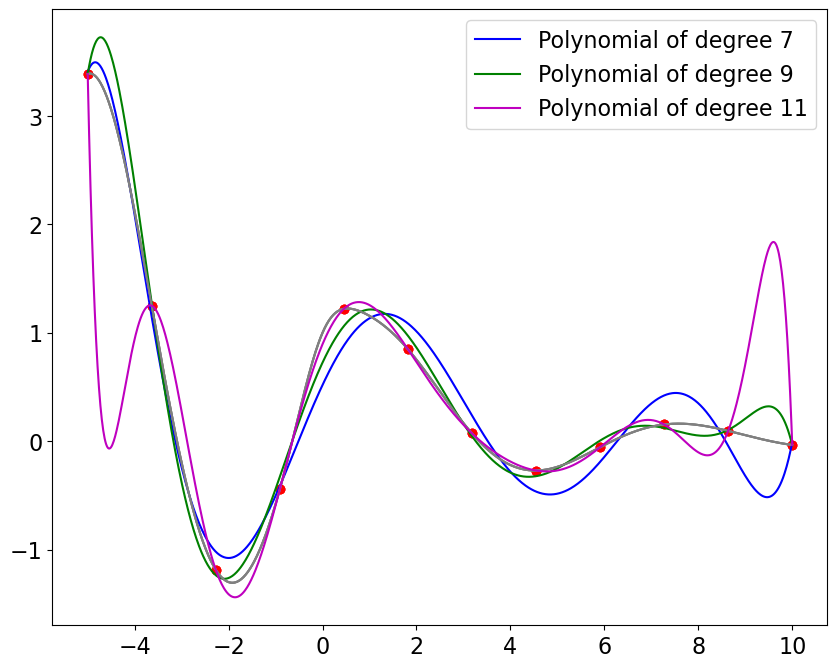

In [34]:
# how degree of the polynomial affects the approximation
for degree, clr in (7,'b'),(9,'g'),(11,'m'):
    p=polynomial.polyfit(xr,func(xr),degree)
    fi=lambda x: polynomial.polyval(x,p)
    plot1(fi,fdata=(xr,func(xr)),label='Polynomial of degree %d'%degree,color=clr,extrapolation=True)